# Example 5.7

Use the finite difference method to determine the change of the exes pore pressure with time for problem 5.2. Assume the top and bottom layers are permeable and that the initial pore pressure is
hydrostatic. Plot the results in terms of normalized time and depth.

## Principles:

$\cfrac{\partial u}{\partial t}= C_v \cfrac{\partial^2 u}{\partial z^2}$

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [125]:
# Start with input

H_0=10 # Layer thickness in m
Nz=100 #Desired number of nodes
dsigma= 200 #increment of stress

dz=10/(Nz-1) #spatial discretization

z= np.linspace(0, H_0, Nz) #node coordinates

Cv=1 # assumed Cv in m^2/yr (more about this later)

tf=40 # 10 years

dt= 0.001 #time step

Nt=int(tf/dt)+1

# save snapshots very
Nsave=1000

In [126]:
# initialize variables

u_rate=np.zeros(Nz) # rate of change of pore pressure

u=np.zeros(Nz) # pore pressures are zeroed

for i in range(Nz):
    u[i]=dsigma #initializing the pore pressures

u[0]=0 # top BC
u[-1]=0 # bottom BC
    

Text(0, 0.5, 'Normalized depth $Z=z/H_{dr}$')

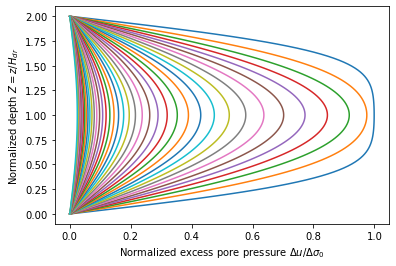

In [127]:
t_clock=0.0
Modeling_data=[]
step_data=pd.DataFrame(data={'u':u, 'z': z})
Modeling_data.append([step_data, t_clock]) # time-tagged data collection
c=0 # counter
for k in range(Nt):
    u_rate[1:-1]=Cv* (u[2:]-2* u[1:-1]+ u[:-2] )/dz**2
    u=u+ dt*u_rate #explicit solution
    t_clock=t_clock+dt # real time
    c = c+1
    if (c==Nsave):
        step_data=pd.DataFrame(data={'u':u/dsigma, 'z': 2*z/H_0})
        Modeling_data.append([step_data, t_clock]) # time-tagged data collection
        plt.plot(u/dsigma, 2*z/H_0)
        c=0

plt.xlabel(r'Normalized excess pore pressure $\Delta u/ \Delta \sigma_0$')
plt.ylabel(r'Normalized depth $Z=z/H_{dr}$')

# Example 5.8

## Principles

$\Delta u(z, t)= \Delta \sigma \sum_{n=0}^{\infty} \cfrac{4}{(2n+1)\pi} \exp \left[- \cfrac{(2n+1)^2 \pi^2}{4} T_v\right] \sin \left[\cfrac{(2n+1)\pi}{2} Z\right]$

In [128]:
t=np.linspace(0,40,41) #time
Tv=Cv*t/(0.5*H_0)**2 # Calculating Tv
Tv

array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
       0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
       0.88, 0.92, 0.96, 1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28,
       1.32, 1.36, 1.4 , 1.44, 1.48, 1.52, 1.56, 1.6 ])

In [129]:
def du_t_z(Tv, Z, n, dsigma):
    
    u_norm=np.zeros(len(Z))
    for k in range(len(Tv)):
        for j in range(len(Z)):
            for i in range(n):   
                A=(2*i+1)*np.pi/2         
                u_norm[j]=u_norm[j]+(2/A)*np.exp(-A**2* Tv[k])*np.sin(A*Z[j])
        
        plt.plot(u_norm, Z)
        u_norm=np.zeros(len(Z))
        

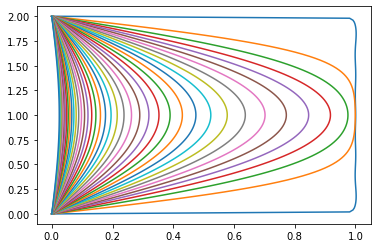

In [130]:
du_t_z(Tv, Z, 500, 200)